# Componentes Principales

#### Imports

In [54]:
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

import numpy as np
from _csv import reader
import math
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from Graphics import draw_pc1_vs_pc2, draw_pc1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Loading the data

In [55]:
with open('europe.csv', 'r') as read_obj:
    csv_reader = reader(read_obj)
    raw_data = list(csv_reader)
    headers =  np.array(raw_data[:1]).T[1:].flatten()
    countries = np.array(raw_data[1:]).T[:1].flatten()
    data = np.array(raw_data[1:]).T[1:].T.astype(float)


#### Calculate Principal Component

In [56]:
standard_scaler = StandardScaler()
standard_scaler.fit(data)
scaled_data = standard_scaler.transform(data)

pca = PCA(n_components=5)
pca.fit(scaled_data)
x = pca.transform(scaled_data)


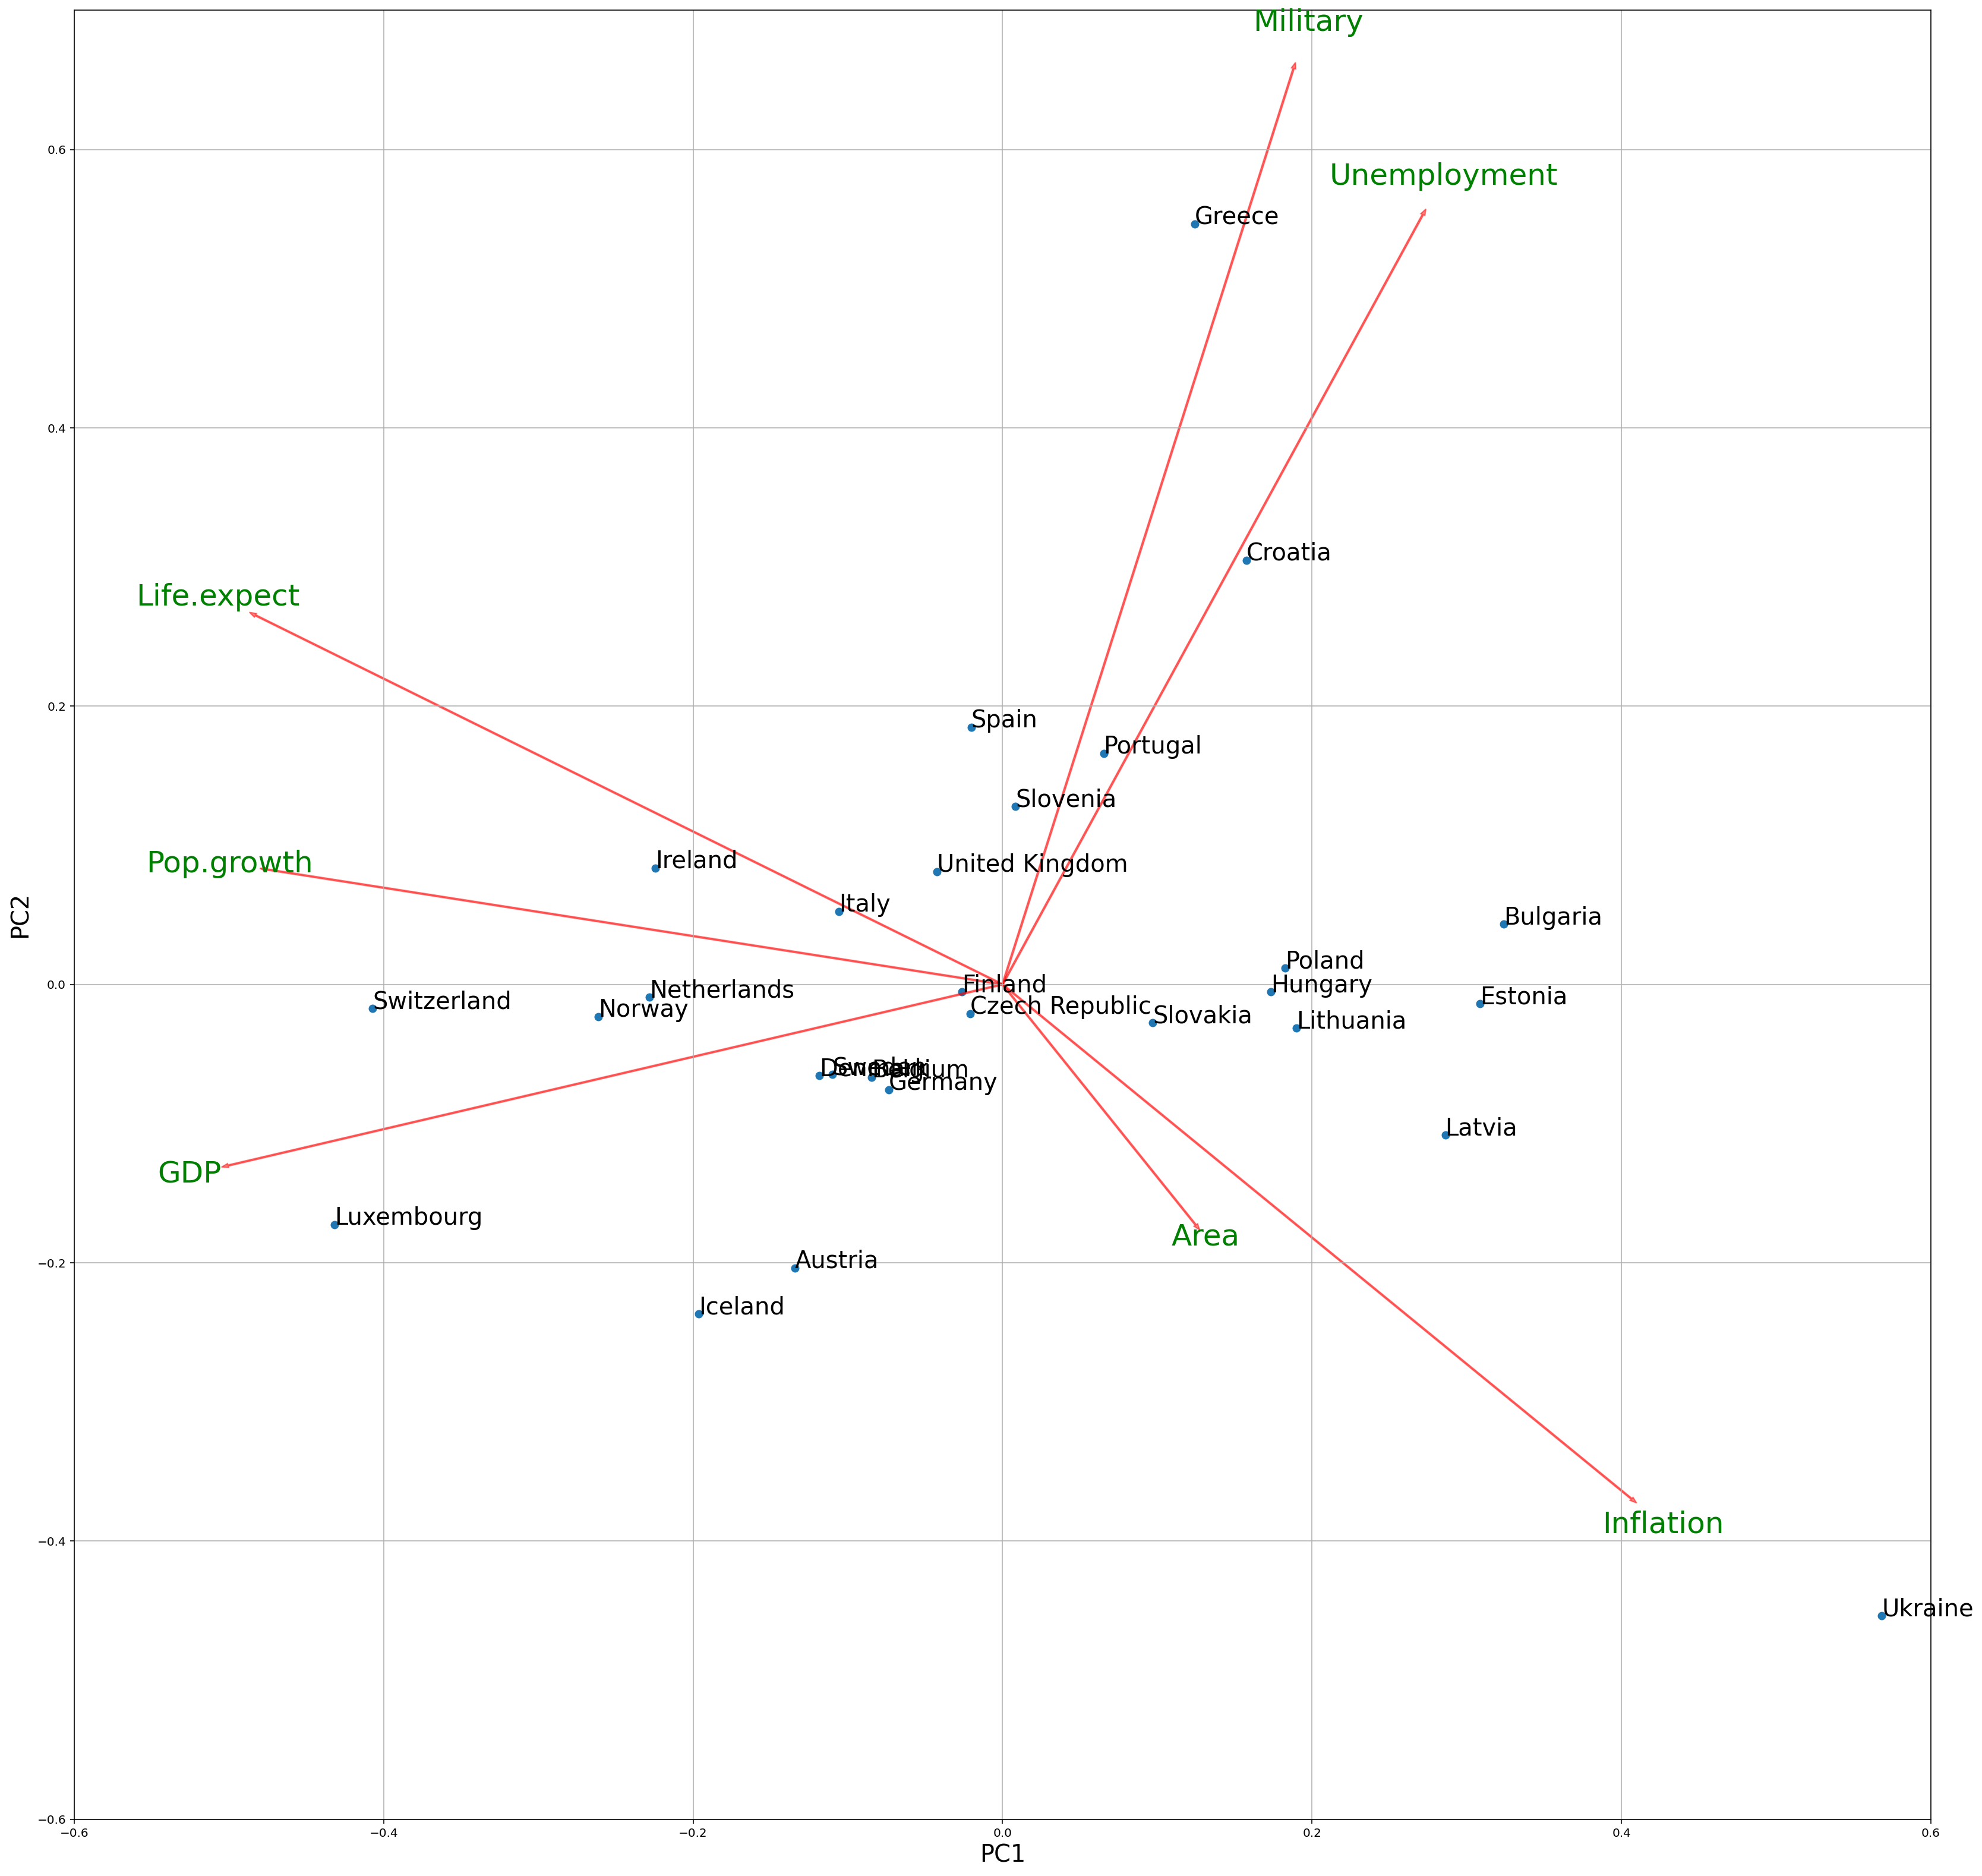

In [57]:
draw_pc1_vs_pc2(x[:,0:2],np.transpose(pca.components_[0:2, :]),headers, marker_labels=countries)

#### First Component

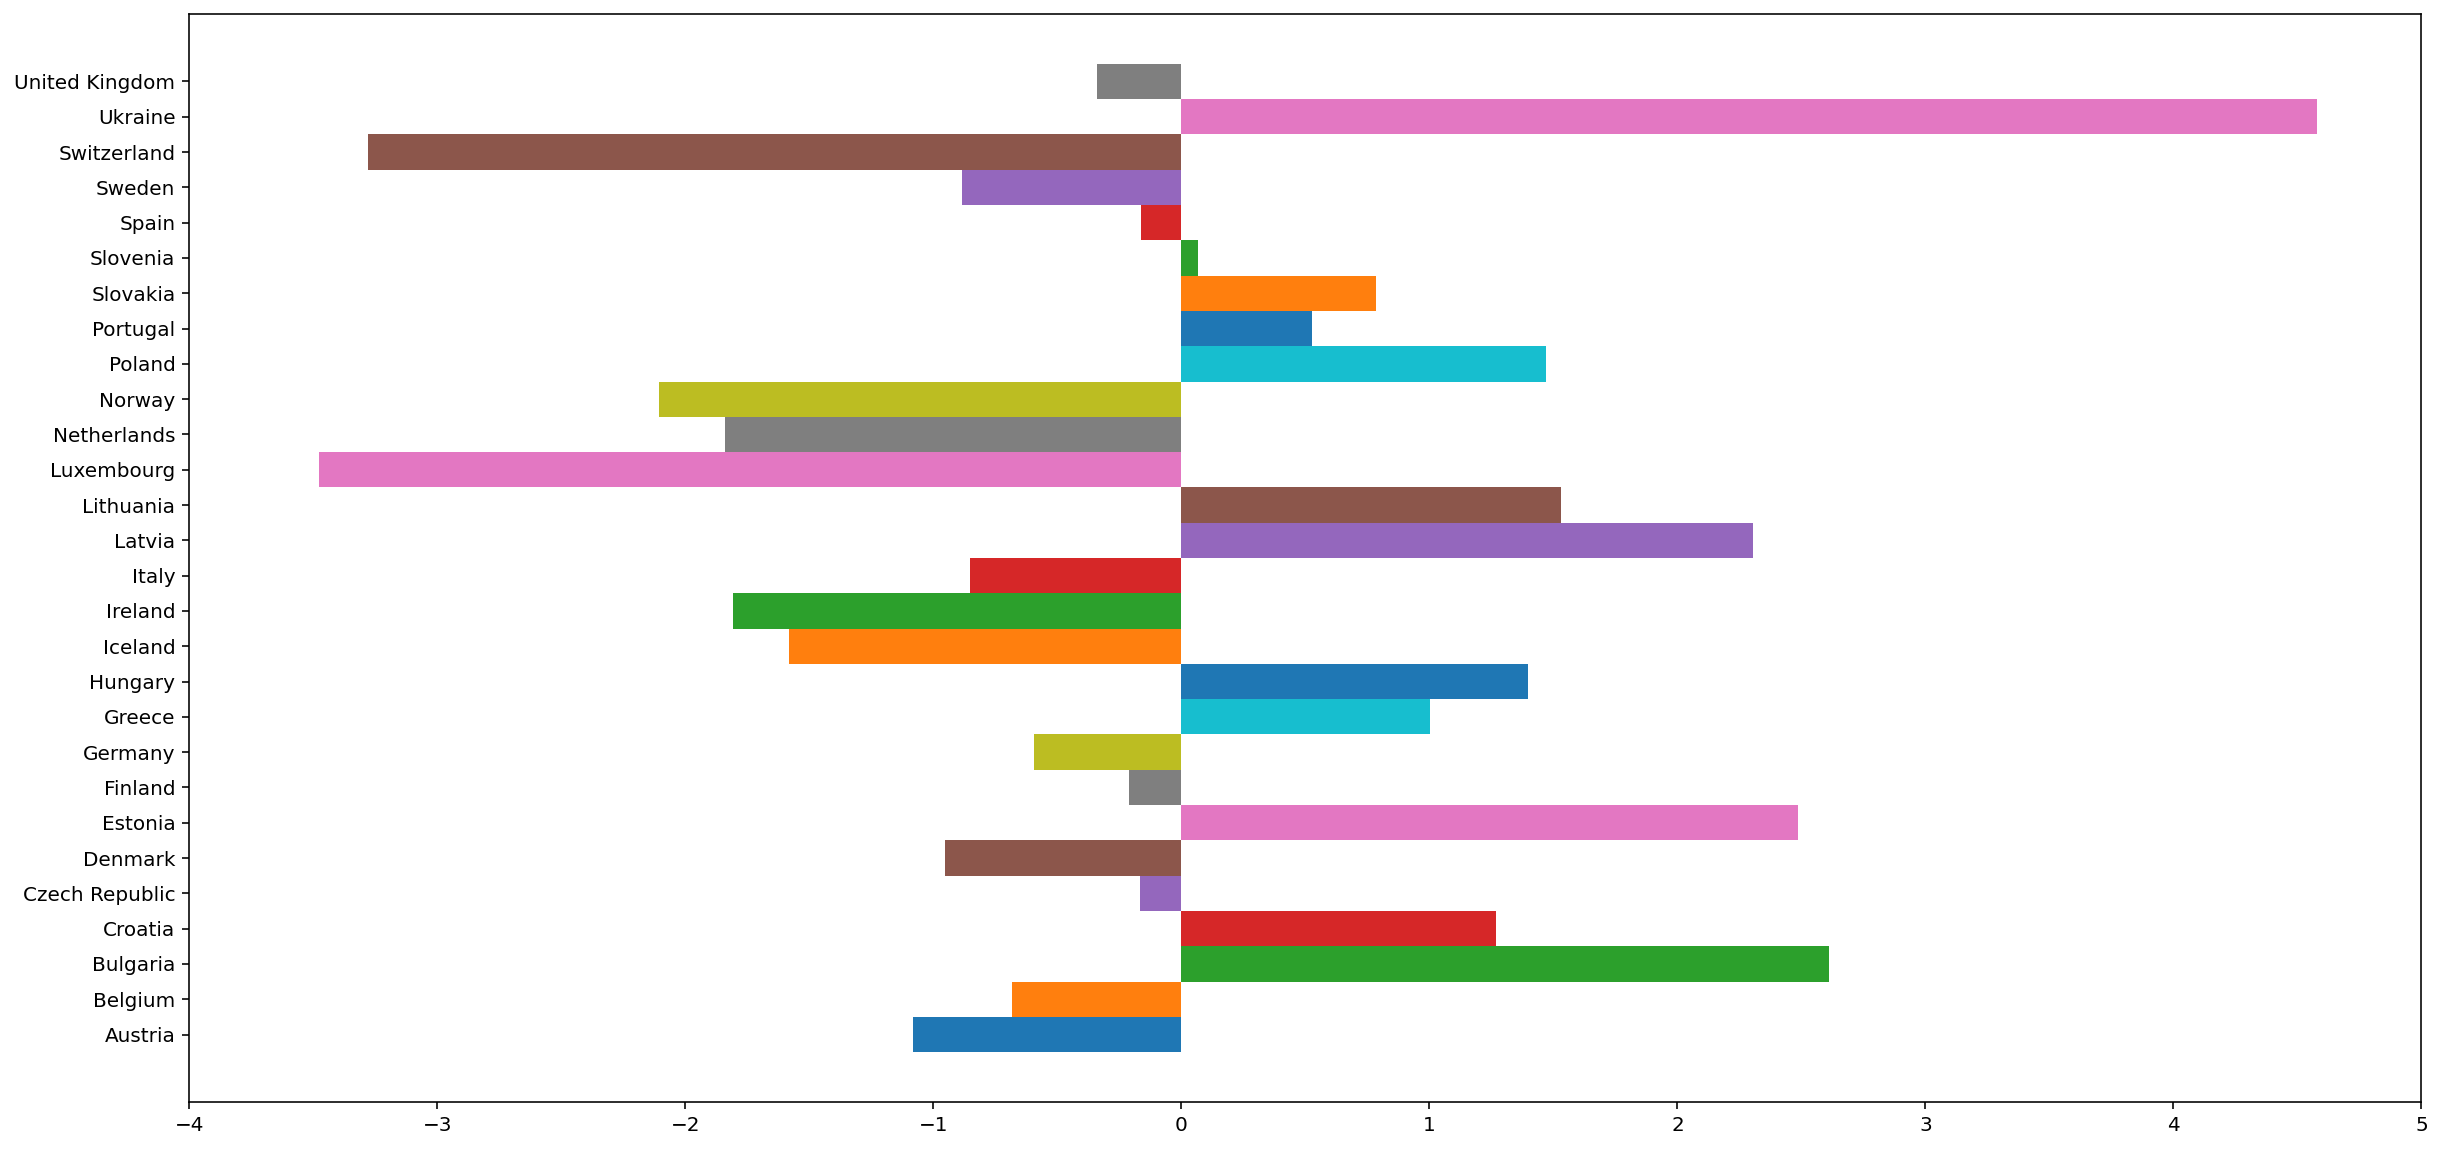

In [58]:
data = x[:,0:1].flatten()
draw_pc1(data,countries)

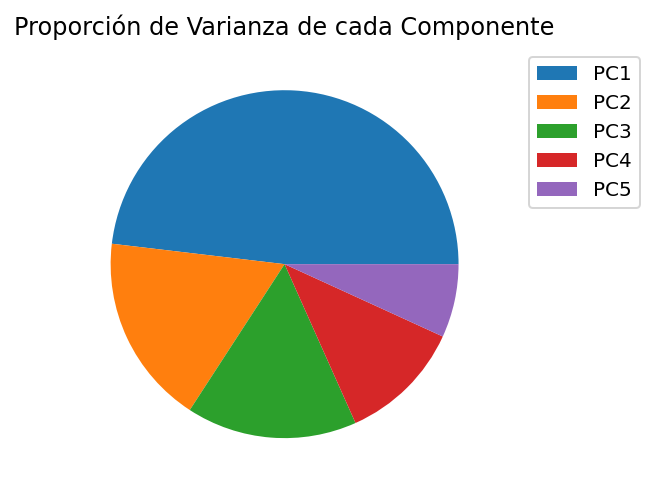

In [61]:
plt.pie(pca.explained_variance_ratio_)
plt.title("Proporción de Varianza de cada Componente")
plt.legend([f"PC{i}" for i in range(1,6)],loc="upper left",bbox_to_anchor=(1.04,1))
plt.show()